Paso 1: Conexión a la Base de Datos

In [19]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Conectar a la base de datos existente
conexion = sqlite3.connect('analisis_vuelos.db')

Paso 2: Verificación (Opcional)

In [4]:
# Consulta para verificar las tablas (opcional)
consulta_tablas = "SELECT name FROM sqlite_master WHERE type='table';"
df_tablas = pd.read_sql_query(consulta_tablas, conexion)
print("Tablas en la base de datos:")
print(df_tablas)

Tablas en la base de datos:
                  name
0  vuelos_normalizados
1           provincias


In [5]:
# Consulta SQL con JOIN para obtener el total de vuelos por provincia
consulta_sql_join = """
SELECT
    p.provincia AS origen_provincia,
    SUM(vn.vuelos) AS total_vuelos,
    AVG(vn.ocupacion) AS ocupacion_promedio
FROM
    vuelos_normalizados AS vn
JOIN
    provincias AS p ON vn.id_origen_provincia = p.id_provincia
GROUP BY
    origen_provincia
ORDER BY
    total_vuelos DESC;
"""

# Ejecutar la consulta y guardar el resultado en un DataFrame
df_resultados = pd.read_sql_query(consulta_sql_join, conexion)



print("\nResultados de la consulta SQL:")
print(df_resultados.head(5))


Resultados de la consulta SQL:
                  origen_provincia  total_vuelos  ocupacion_promedio
0  Ciudad Autónoma de Buenos Aires         58470           84.224396
1                    Internacional         39826           81.233595
2                     Buenos Aires         35511           81.970505
3                          Córdoba         11704           82.655957
4                          Mendoza          9793           79.566139


In [6]:
# Suponiendo que ya tienes la conexión a la base de datos abierta

# Define la consulta SQL
consulta_analisis_1 = """
SELECT
    fecha_vuelos,
    SUM(vuelos) AS total_vuelos_diarios
FROM
    vuelos_normalizados
GROUP BY
    fecha_vuelos
ORDER BY
    fecha_vuelos;
"""

# Ejecuta la consulta
df_resultados_1 = pd.read_sql_query(consulta_analisis_1, conexion)

# Muestra el DataFrame con los resultados
print("Resultados de la consulta:")
print(df_resultados_1)

Resultados de la consulta:
            fecha_vuelos  total_vuelos_diarios
0    2024-01-01 00:00:00                   586
1    2024-01-02 00:00:00                   631
2    2024-01-03 00:00:00                   639
3    2024-01-04 00:00:00                   645
4    2024-01-05 00:00:00                   639
..                   ...                   ...
361  2024-12-27 00:00:00                   725
362  2024-12-28 00:00:00                   703
363  2024-12-29 00:00:00                   705
364  2024-12-30 00:00:00                   735
365  2024-12-31 00:00:00                   582

[366 rows x 2 columns]


In [7]:
# Suponiendo que ya tienes la conexión a la base de datos abierta

# Define la consulta SQL
consulta_analisis_2 = """
SELECT
    CASE
        WHEN es_feriado_largo = 1 THEN 'Feriado Largo'
        ELSE 'Día Normal'
    END AS tipo_de_dia,
    ROUND(AVG(vuelos_diarios), 0) AS promedio_vuelos_diarios,
    ROUND(AVG(pasajeros_diarios), 0) AS promedio_pasajeros_diarios,
    ROUND(AVG(ocupacion_diaria), 2) AS promedio_ocupacion_diaria
FROM
    (
        SELECT
            fecha_vuelos,
            es_feriado_largo,
            SUM(vuelos) AS vuelos_diarios,
            SUM(pasajeros) AS pasajeros_diarios,
            (SUM(pasajeros) * 100.0) / SUM(asientos) AS ocupacion_diaria
        FROM
            vuelos_normalizados
        GROUP BY
            fecha_vuelos
    ) AS tabla_diaria
GROUP BY
    tipo_de_dia;
"""

# Ejecuta la consulta
df_resultados_2 = pd.read_sql_query(consulta_analisis_2, conexion)

# Muestra el DataFrame con los resultados
print("Resultados de la consulta de comparación de dias que son feriado largo y normales:")
print(df_resultados_2.head())


Resultados de la consulta de comparación de dias que son feriado largo y normales:
     tipo_de_dia  promedio_vuelos_diarios  promedio_pasajeros_diarios  \
0     Día Normal                    576.0                     79490.0   
1  Feriado Largo                    591.0                     82024.0   

   promedio_ocupacion_diaria  
0                      83.74  
1                      84.36  


C:\Users\ezeni\AppData\Local\Temp\ipykernel_23604\184642577.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ezeni\AppData\Local\Temp\ipykernel_23604\184642577.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ezeni\AppData\Local\Temp\ipykernel_23604\184642577.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


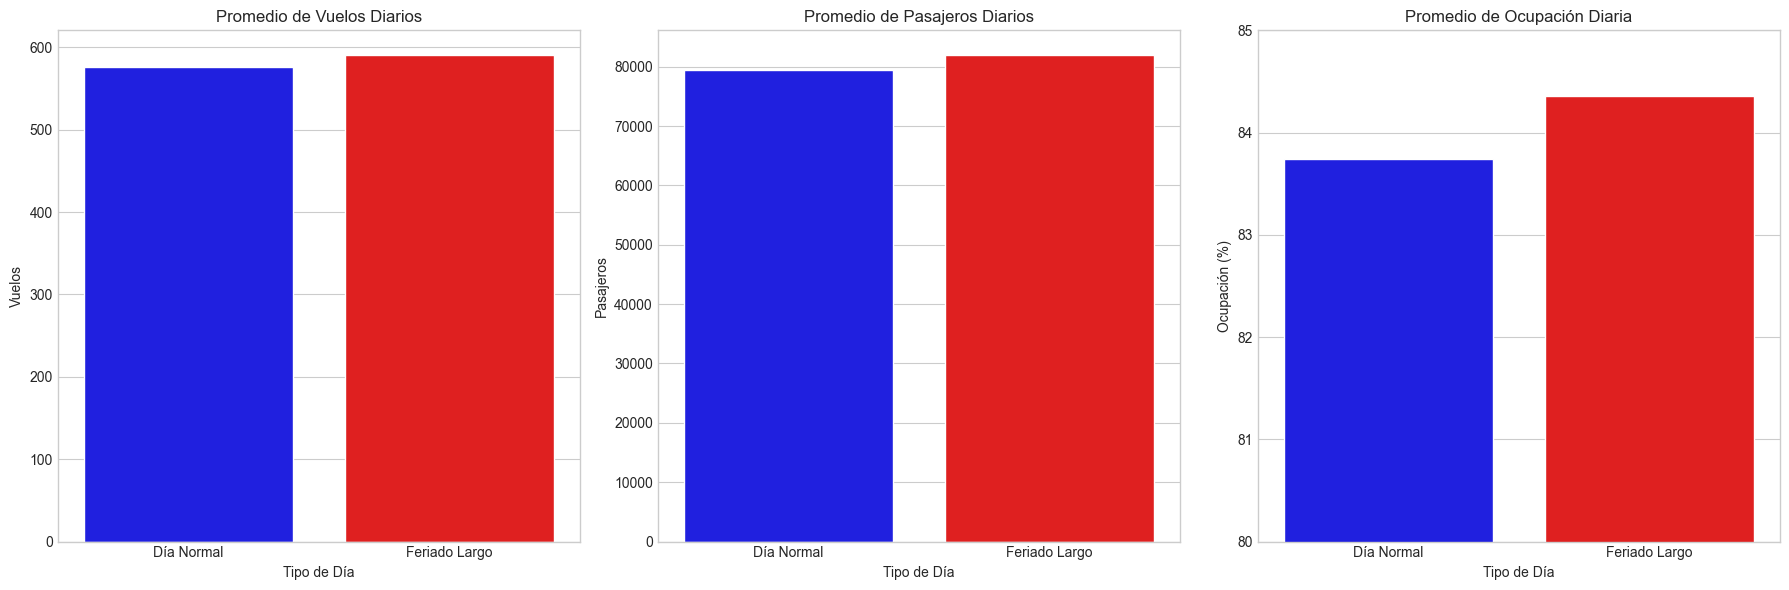

In [8]:


# Configurar el estilo de los gráficos
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')

# Crear un lienzo con tres subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# --- Gráfico 1: Promedio de Vuelos Diarios ---
sns.barplot(
    x='tipo_de_dia',
    y='promedio_vuelos_diarios',
    data=df_resultados_2,
    palette=['blue', 'red'],  # Aquí asignas los colores
    ax=axes[0]
)
axes[0].set_title('Promedio de Vuelos Diarios')
axes[0].set_ylabel('Vuelos')
axes[0].set_xlabel('Tipo de Día')
axes[0].tick_params(axis='x', rotation=0)

# --- Gráfico 2: Promedio de Pasajeros Diarios ---
sns.barplot(
    x='tipo_de_dia',
    y='promedio_pasajeros_diarios',
    data=df_resultados_2,
    palette=['blue', 'red'],  # Aquí asignas los colores
    ax=axes[1]
)
axes[1].set_title('Promedio de Pasajeros Diarios')
axes[1].set_ylabel('Pasajeros')
axes[1].set_xlabel('Tipo de Día')
axes[1].tick_params(axis='x', rotation=0)

# --- Gráfico 3: Promedio de Ocupación Diaria ---
sns.barplot(
    x='tipo_de_dia',
    y='promedio_ocupacion_diaria',
    data=df_resultados_2,
    palette=['blue', 'red'],  # Aquí asignas los colores
    ax=axes[2]
)
axes[2].set_title('Promedio de Ocupación Diaria')
axes[2].set_ylabel('Ocupación (%)')
axes[2].set_xlabel('Tipo de Día')
axes[2].set_ylim(80, 85) # Ajusta el límite para ver mejor la diferencia
axes[2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

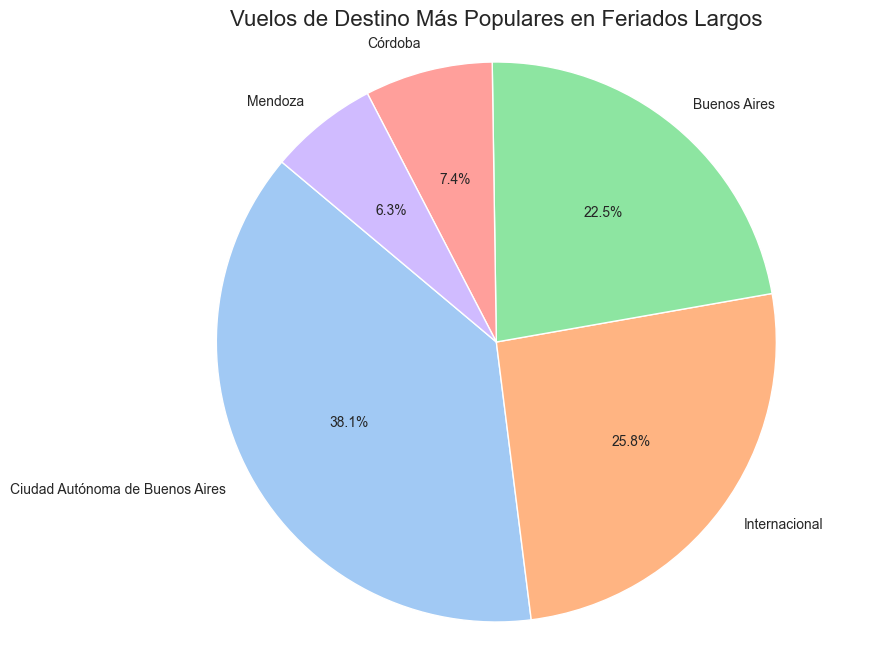

In [9]:
# Suponiendo que la conexión a la base de datos ya está abierta

# Definir la consulta SQL para obtener los vuelos por provincia en feriados largos
consulta_feriados_provincia = """
SELECT
    p.provincia AS destino_provincia,
    SUM(vn.vuelos) AS total_vuelos_feriados
FROM
    vuelos_normalizados AS vn
JOIN
    provincias AS p ON vn.id_destino_provincia = p.id_provincia
WHERE
    vn.es_feriado_largo = 1
GROUP BY
    p.provincia
ORDER BY
    total_vuelos_feriados DESC;
"""

# Ejecutar la consulta y guardar el resultado
df_feriados_provincia = pd.read_sql_query(consulta_feriados_provincia, conexion)

# Tomar las 5 provincias más populares para el gráfico (opcional, para mayor claridad)
top_5_provincias = df_feriados_provincia.head(5)

# --- Crear el gráfico de torta ---
plt.figure(figsize=(10, 8))
plt.pie(
    top_5_provincias['total_vuelos_feriados'],
    labels=top_5_provincias['destino_provincia'],
    autopct='%1.1f%%', # Muestra el porcentaje con un decimal
    startangle=140,
    colors=sns.color_palette("pastel")
)

plt.title('Vuelos de Destino Más Populares en Feriados Largos', fontsize=16)
plt.axis('equal') # Asegura que la torta sea un círculo perfecto
plt.show()

# Opcionalmente, puedes cerrar la conexión aquí si ya no la necesitas
# conexion.close()

In [10]:
# Suponiendo que la conexión a la base de datos ya está abierta

# Consulta SQL para las 10 rutas más populares en feriados
consulta_rutas_feriados = """
SELECT
    p_origen.provincia AS origen,
    p_destino.provincia AS destino,
    SUM(vn.vuelos) AS total_vuelos_feriados
FROM
    vuelos_normalizados AS vn
JOIN
    provincias AS p_origen ON vn.id_origen_provincia = p_origen.id_provincia
JOIN
    provincias AS p_destino ON vn.id_destino_provincia = p_destino.id_provincia
WHERE
    vn.es_feriado_largo = 1
GROUP BY
    origen, destino
ORDER BY
    total_vuelos_feriados DESC
LIMIT 10;
"""

# Ejecutar la consulta y guardar el resultado en un DataFrame
df_rutas_feriados = pd.read_sql_query(consulta_rutas_feriados, conexion)

# Muestra el resultado de la consulta
print("Las 10 rutas más populares en feriados largos:")
print(df_rutas_feriados)

Las 10 rutas más populares en feriados largos:
                            origen                          destino  \
0                     Buenos Aires                    Internacional   
1                    Internacional                     Buenos Aires   
2  Ciudad Autónoma de Buenos Aires                    Internacional   
3                    Internacional  Ciudad Autónoma de Buenos Aires   
4  Ciudad Autónoma de Buenos Aires                         Misiones   
5                          Mendoza  Ciudad Autónoma de Buenos Aires   
6  Ciudad Autónoma de Buenos Aires                          Córdoba   
7  Ciudad Autónoma de Buenos Aires                          Mendoza   
8                         Misiones  Ciudad Autónoma de Buenos Aires   
9                          Córdoba  Ciudad Autónoma de Buenos Aires   

   total_vuelos_feriados  
0                   1330  
1                   1290  
2                    913  
3                    904  
4                    324  
5        

C:\Users\ezeni\AppData\Local\Temp\ipykernel_23604\110446165.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


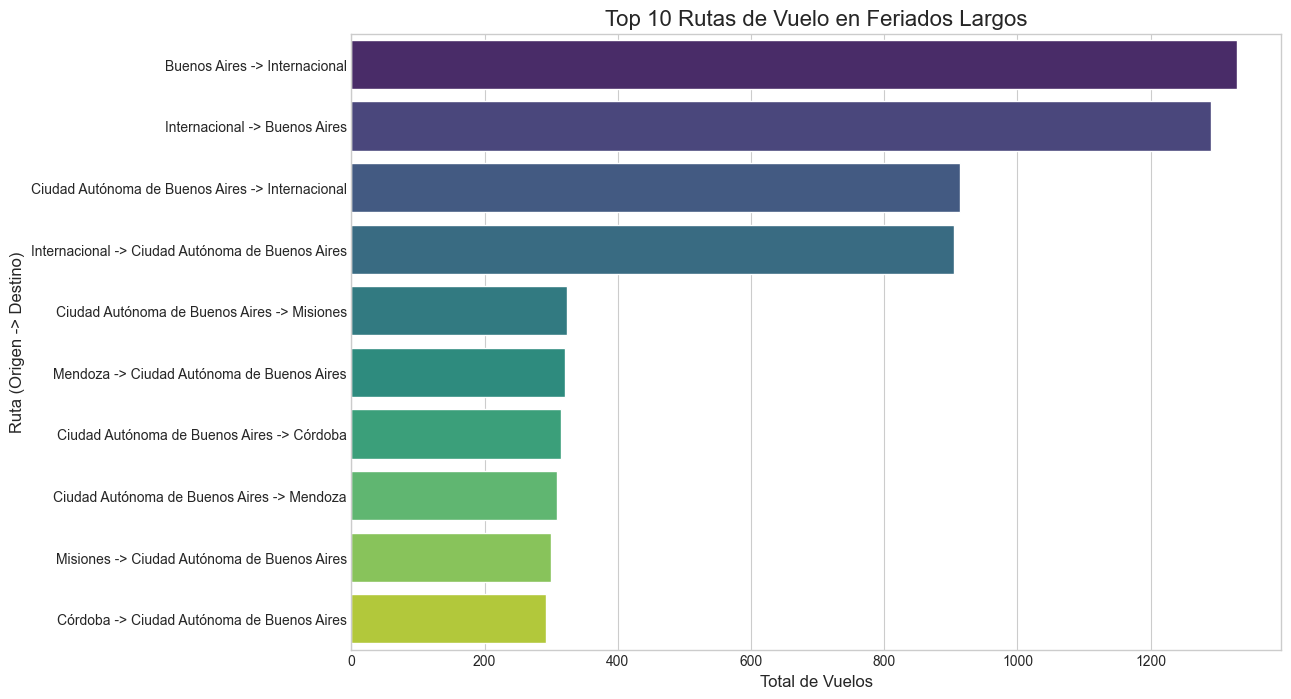

In [11]:
# Crear una nueva columna que combine origen y destino para la visualización
df_rutas_feriados['ruta'] = df_rutas_feriados['origen'] + ' -> ' + df_rutas_feriados['destino']

# Configurar el estilo del gráfico
plt.figure(figsize=(12, 8))

# Crear el gráfico de barras horizontal
sns.barplot(
    x='total_vuelos_feriados',
    y='ruta',
    data=df_rutas_feriados,
    palette='viridis'
)

# Agregar etiquetas y título
plt.title('Top 10 Rutas de Vuelo en Feriados Largos', fontsize=16)
plt.xlabel('Total de Vuelos', fontsize=12)
plt.ylabel('Ruta (Origen -> Destino)', fontsize=12)
plt.show()

# Opcionalmente, puedes cerrar la conexión aquí si ya no la necesitas
# conexion.close()

Resultados de la estacionalidad mensual:
   mes  promedio_vuelos_diarios  promedio_ocupacion_diaria
0   01                    606.0                      87.00
1   02                    605.0                      85.44
2   03                    596.0                      83.74
3   04                    533.0                      82.00
4   05                    473.0                      81.42
5   06                    508.0                      82.05
6   07                    611.0                      83.88
7   08                    583.0                      82.45
8   09                    560.0                      84.93
9   10                    572.0                      84.76
10  11                    618.0                      84.94
11  12                    660.0                      82.81


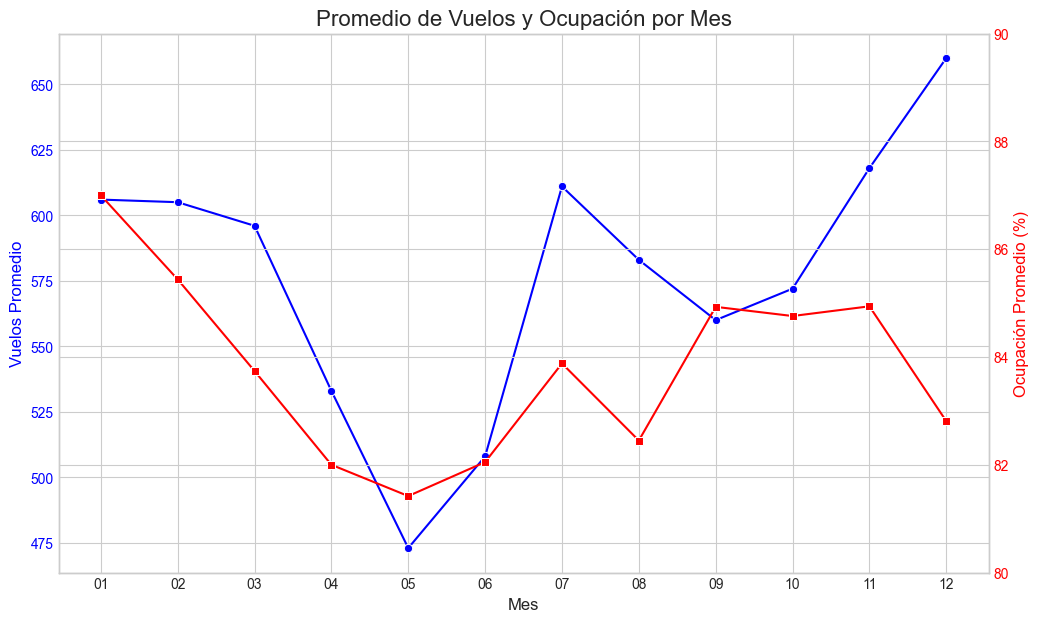

In [12]:
# Paso 1: Consulta SQL para el análisis mensual
# Extrae el mes, agrupa por mes y calcula el promedio de vuelos y ocupación
consulta_estacionalidad = """
SELECT
    STRFTIME('%m', fecha_vuelos) AS mes,
    ROUND(AVG(vuelos_diarios), 0) AS promedio_vuelos_diarios,
    ROUND(AVG(ocupacion_diaria), 2) AS promedio_ocupacion_diaria
FROM
    (
        SELECT
            fecha_vuelos,
            SUM(vuelos) AS vuelos_diarios,
            (SUM(pasajeros) * 100.0) / SUM(asientos) AS ocupacion_diaria
        FROM
            vuelos_normalizados
        GROUP BY
            fecha_vuelos
    ) AS tabla_diaria
GROUP BY
    mes
ORDER BY
    mes;
"""

# Ejecutar la consulta y guardar el resultado
df_estacionalidad = pd.read_sql_query(consulta_estacionalidad, conexion)
print("Resultados de la estacionalidad mensual:")
print(df_estacionalidad)

# Paso 2: Visualización con un gráfico de línea
# Crear un gráfico con dos ejes Y para mostrar vuelos y ocupación
fig, ax1 = plt.subplots(figsize=(12, 7))

# Gráfico para los vuelos diarios promedio
sns.lineplot(x='mes', y='promedio_vuelos_diarios', data=df_estacionalidad, color='b', ax=ax1, marker='o')
ax1.set_title('Promedio de Vuelos y Ocupación por Mes', fontsize=16)
ax1.set_xlabel('Mes', fontsize=12)
ax1.set_ylabel('Vuelos Promedio', color='b', fontsize=12)
ax1.tick_params(axis='y', labelcolor='b')

# Crear un segundo eje Y para la ocupación
ax2 = ax1.twinx()
sns.lineplot(x='mes', y='promedio_ocupacion_diaria', data=df_estacionalidad, color='r', ax=ax2, marker='s')
ax2.set_ylabel('Ocupación Promedio (%)', color='r', fontsize=12)
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylim(80, 90) # Ajusta el eje Y para la ocupación para ver mejor la variación

plt.show()


Realizando análisis: Boxplot de Vuelos en Feriados vs. Días Normales...
DataFrame con la cantidad de vuelos por día (primeras filas):
     tipo_de_dia  vuelos_diarios
0  Feriado Largo             586
1     Día Normal             631
2     Día Normal             639
3     Día Normal             645
4     Día Normal             639


C:\Users\ezeni\AppData\Local\Temp\ipykernel_23604\1787980824.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


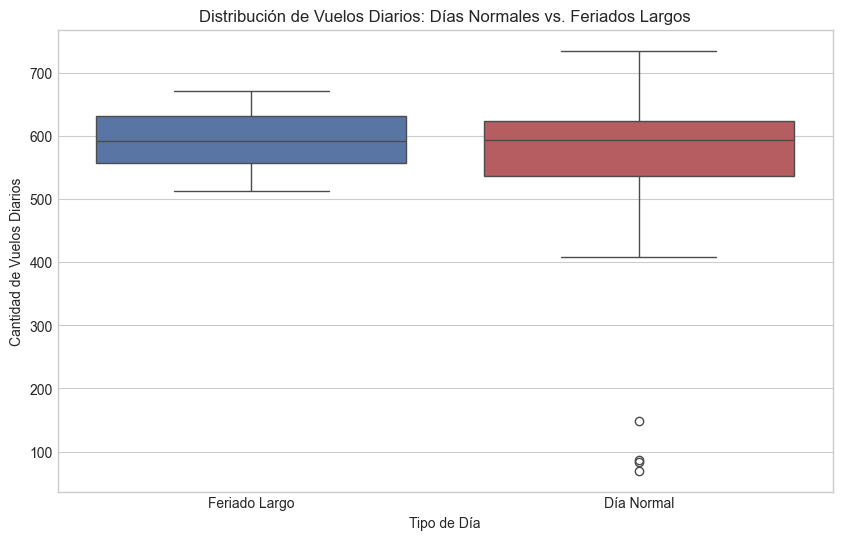

In [13]:
# --- Análisis 1: Boxplot para la distribución de vuelos diarios ---
print("\nRealizando análisis: Boxplot de Vuelos en Feriados vs. Días Normales...")

# Consulta SQL para obtener la cantidad de vuelos diarios por tipo de día
# Esta consulta no promedia, sino que obtiene los totales diarios para el boxplot
consulta_boxplot_vuelos = """
SELECT
    CASE
        WHEN es_feriado_largo = 1 THEN 'Feriado Largo'
        ELSE 'Día Normal'
    END AS tipo_de_dia,
    SUM(vuelos) AS vuelos_diarios
FROM
    vuelos_normalizados
GROUP BY
    fecha_vuelos;
"""

df_vuelos_diarios = pd.read_sql_query(consulta_boxplot_vuelos, conexion)
print("DataFrame con la cantidad de vuelos por día (primeras filas):")
print(df_vuelos_diarios.head())

# Visualización con Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='tipo_de_dia',
    y='vuelos_diarios',
    data=df_vuelos_diarios,
    palette=['#4c72b0', '#c44e52']
)

plt.title('Distribución de Vuelos Diarios: Días Normales vs. Feriados Largos')
plt.xlabel('Tipo de Día')
plt.ylabel('Cantidad de Vuelos Diarios')
plt.show()

In [ ]:
import pandas as pd
import sqlite3
from scipy import stats

# Conectarse a la base de datos
conexion = sqlite3.connect('analisis_vuelos.db')

# Obtener el ID de la provincia de Córdoba para el filtro
# Primero, consulta la tabla de provincias
consulta_id_cordoba = "SELECT id_provincia FROM provincias WHERE provincia = 'Córdoba';"
id_cordoba = pd.read_sql_query(consulta_id_cordoba, conexion)['id_provincia'].iloc[0]

# Obtener los datos de ocupación para los vuelos a Córdoba
consulta_cordoba = f"""
SELECT (SUM(pasajeros) * 100.0) / SUM(asientos) AS ocupacion_diaria
FROM vuelos_normalizados
WHERE id_destino_provincia = {id_cordoba}
GROUP BY fecha_vuelos;
"""
ocupacion_cordoba = pd.read_sql_query(consulta_cordoba, conexion)['ocupacion_diaria']

# Obtener los datos de ocupación para los vuelos a otras provincias
consulta_otras_provincias = f"""
SELECT (SUM(pasajeros) * 100.0) / SUM(asientos) AS ocupacion_diaria
FROM vuelos_normalizados
WHERE id_destino_provincia != {id_cordoba}
GROUP BY fecha_vuelos;
"""
ocupacion_otras = pd.read_sql_query(consulta_otras_provincias, conexion)['ocupacion_diaria']

In [18]:
# Realizar la prueba t de Student
t_statistic, p_value = stats.ttest_ind(
    ocupacion_cordoba,
    ocupacion_otras,
    equal_var=False,
    alternative='greater' # La hipótesis es que la ocupación de Córdoba es mayor
)

print(f"Estadístico t: {t_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")

Estadístico t: 0.6341
Valor p: 0.2631


In [ ]:
conexion.close()